# Data Driven Intrusion Detection: Exploratory Analysis

We start the analysis reading data from file. 

A8-4  --> ROOT

---- A8-9  --> 2001:db8::1711:6b10:65fa:b822

---- A8-16 --> 2001:db8::1711:6b10:65fa:bf26

--------  A8-25 --> 2001:db8::1711:6b10:65fc:bd06

--------  A8-30 --> 2001:db8::1711:6b10:65fb:b816

------------  A8-34 --> 2001:db8::1711:6b10:65fa:be52

--------  A8-39 --> 2001:db8::1711:6b10:65f8:bd36

In [1]:
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

node = {} # <m3_node, [time in ms for each icmp message]>
icmp_seq = [n for n in range(1,101)]

with open('data/data1.log', 'r') as log_file:
    logs = log_file.read().split('\n')
    ip = ''
    for log in logs:
        log = log.split()
        if len(log) > 1 and log[1] == 'ping6':
            ip = log[3]
            node[ip] = []
            print(ip)
        if len(log) > 1 and log[1] == 'timeout':
            node[ip].append(0.0)
        if len(log) > 0 and log[0] == '12':
            ip = log[3][:-1]
            node[ip].append(float(log[len(log)-2]))

2001:db8::1711:6b10:65fa:b822
2001:db8::1711:6b10:65fa:bf26
2001:db8::1711:6b10:65fc:bd06
2001:db8::1711:6b10:65fb:b816
2001:db8::1711:6b10:65fa:be52
2001:db8::1711:6b10:65f8:bd36


For assign each ip (i.e. node) to a bucket indicating the number of hops that separate the node from the root of the DODAG throught RPL protocol.

In [2]:
hops = {1: ['2001:db8::1711:6b10:65fa:b822','2001:db8::1711:6b10:65fa:bf26'], \
        2: ['2001:db8::1711:6b10:65fc:bd06','2001:db8::1711:6b10:65fb:b816','2001:db8::1711:6b10:65f8:bd36'], \
        3: ['2001:db8::1711:6b10:65fa:be52']}

Let us plot the graph of each node.

2001:db8::1711:6b10:65fa:b822


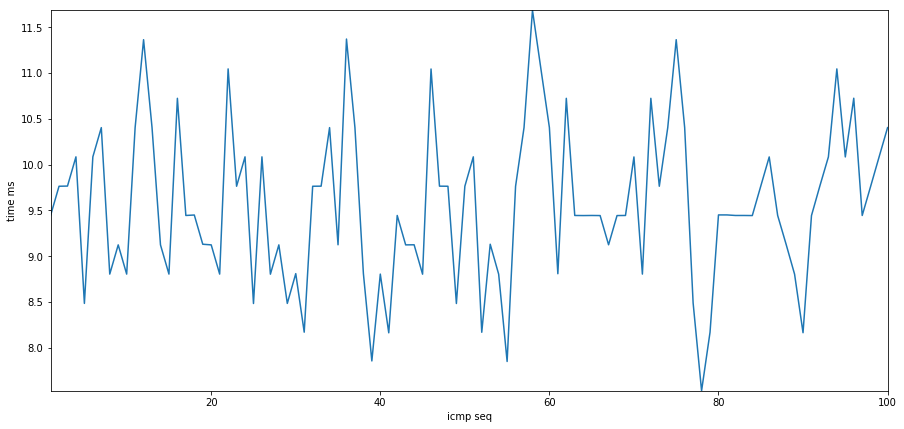

2001:db8::1711:6b10:65fa:bf26


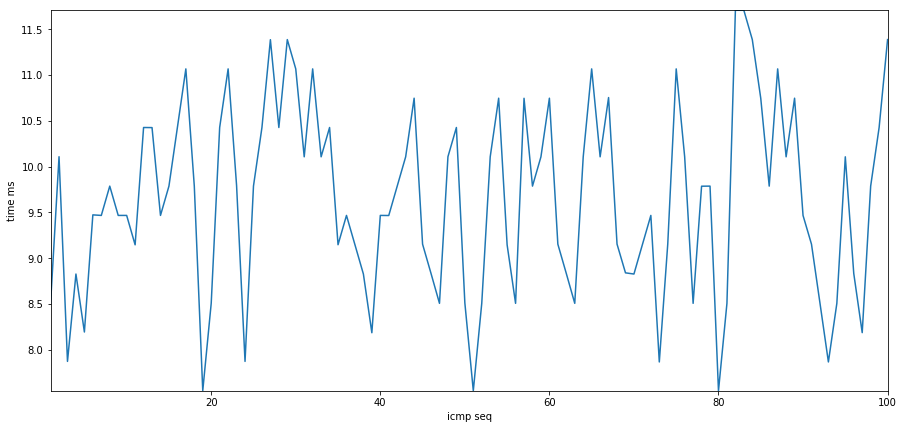

2001:db8::1711:6b10:65fc:bd06


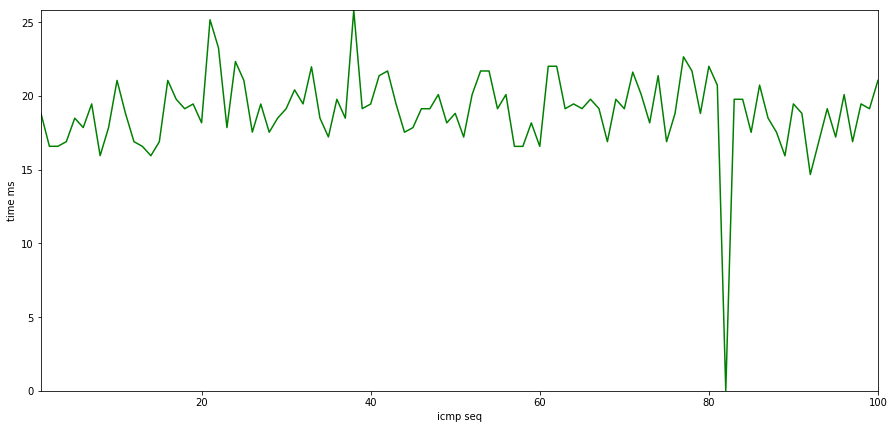

2001:db8::1711:6b10:65fb:b816


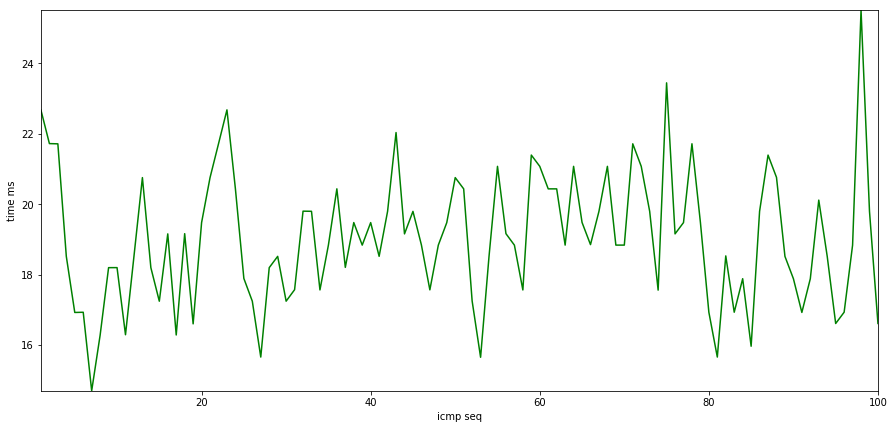

2001:db8::1711:6b10:65fa:be52


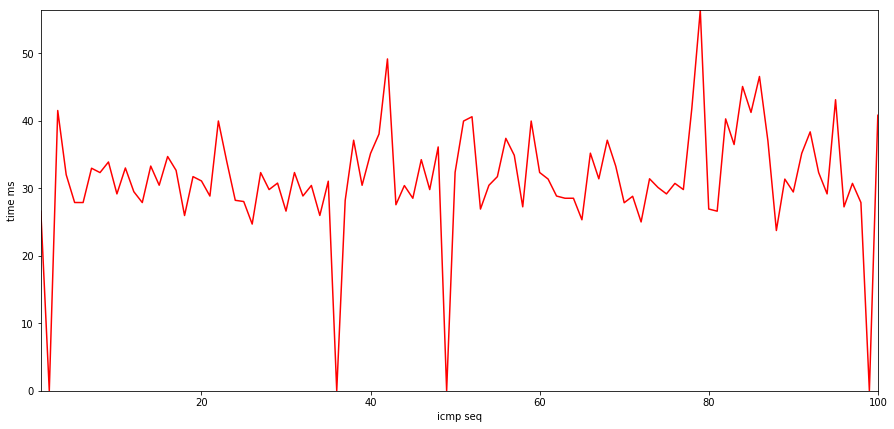

2001:db8::1711:6b10:65f8:bd36


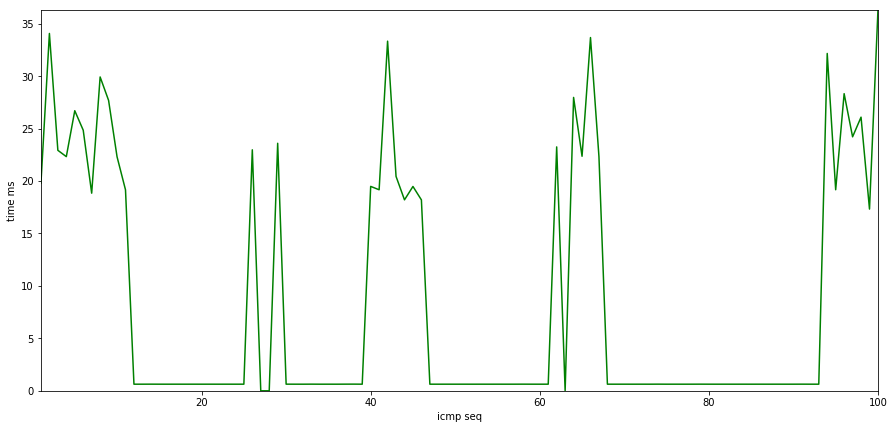

In [3]:
for ip in node:
    print(ip)
    tms = node[ip]
    
    plt.figure(figsize=(15,7))
    plt.ylabel('time ms')
    plt.xlabel('icmp seq')
    if ip in hops[1]:
        plt.plot(icmp_seq, tms, label=ip)
    elif ip in hops[2]:
        plt.plot(icmp_seq, tms, 'green', label=ip)
    else:
        plt.plot(icmp_seq, tms, 'red', label=ip)

    plt.axis([1,icmp_seq[-1], sorted(tms)[0], sorted(tms)[-1]])
    plt.show()

Now we calculate a mean between nodes that has the same distance from the root.

In [4]:
m_hop = {}
for h in hops:
    m_hop[h] = [0.0 for n in range(1, 101)]
    for ip in hops[h]:
        m_hop[h] = [(x + y)/len(hops[h]) for x, y in zip(m_hop[h], node[ip])]

Here the results.

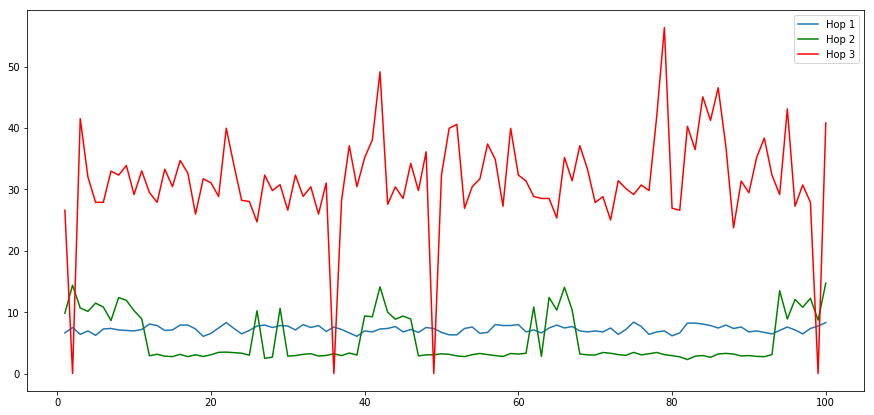

In [5]:
fig, ax = plt.subplots(figsize=(15,7))

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(icmp_seq, m_hop[1], label='Hop 1')

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(icmp_seq, m_hop[2], 'green', label='Hop 2')

# Using plot(..., dashes=...) to set the dashing when creating a line
line3, = ax.plot(icmp_seq, m_hop[3], 'red', label='Hop 3')


ax.legend()
plt.show()

A8-17  --> ROOT

---- A8-25  --> 2001:db8::1711:6b10:65fc:bd06

---- A8-30 --> 2001:db8::1711:6b10:65fb:b816

---- A8-31 --> 2001:db8::1711:6b10:65f7:8516

---- A8-39 --> 2001:db8::1711:6b10:65f8:bd36

--------  A8-42 --> 2001:db8::1711:6b10:65f6:8502

--------  A8-46 --> 2001:db8::1711:6b10:65f1:5822

In [7]:
from matplotlib import pyplot
import numpy as np
import matplotlib.pyplot as plt

node = {} # <m3_node, [time in ms for each icmp message]>
icmp_seq = [n for n in range(1,101)]

with open('data/data2.log', 'r') as log_file:
    logs = log_file.read().split('\n')
    ip = ''
    for log in logs:
        log = log.split()
        if len(log) > 1 and log[1] == 'ping6':
            ip = log[3]
            node[ip] = []
            print(ip)
        if len(log) > 1 and log[1] == 'timeout':
            node[ip].append(0.0)
        if len(log) > 0 and log[0] == '12':
            ip = log[3][:-1]
            node[ip].append(float(log[len(log)-2]))

2001:db8::1711:6b10:65fc:bd06
2001:db8::1711:6b10:65fb:b816
2001:db8::1711:6b10:65f7:8516
2001:db8::1711:6b10:65f8:bd36
2001:db8::1711:6b10:65f6:8502
2001:db8::1711:6b10:65f1:5822


In [8]:
hops = {1: ['2001:db8::1711:6b10:65fc:bd06','2001:db8::1711:6b10:65fb:b816','2001:db8::1711:6b10:65f7:8516','2001:db8::1711:6b10:65f8:bd36'], \
        2: ['2001:db8::1711:6b10:65f6:8502','2001:db8::1711:6b10:65f1:5822']}

2001:db8::1711:6b10:65fc:bd06


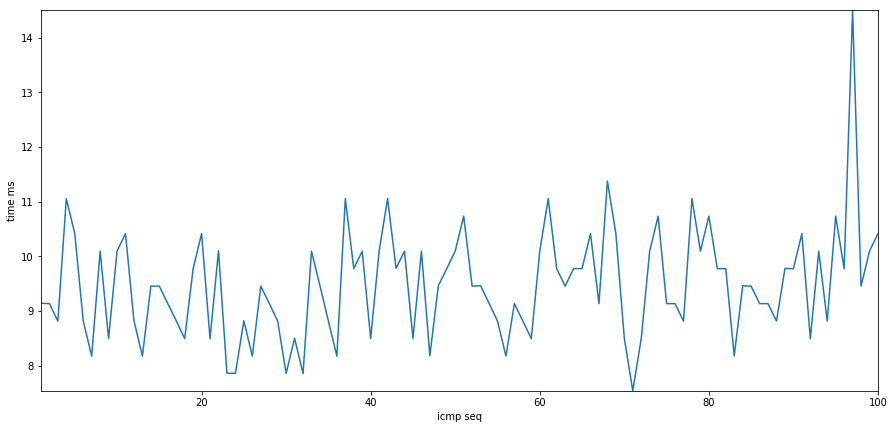

2001:db8::1711:6b10:65fb:b816


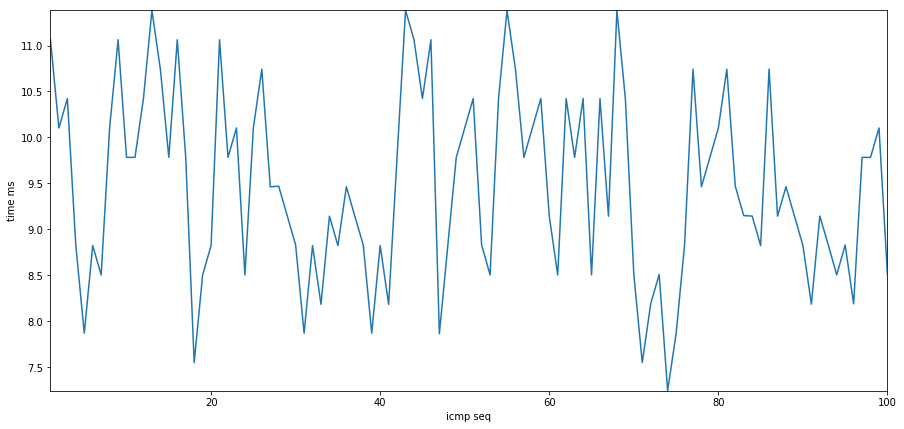

2001:db8::1711:6b10:65f7:8516


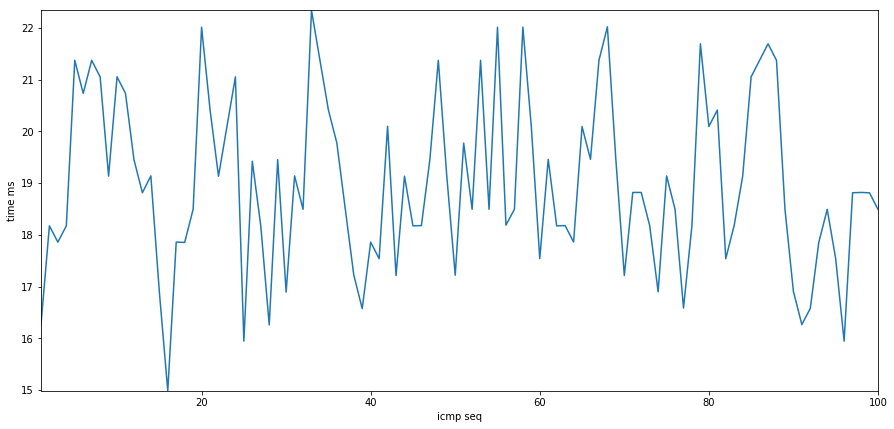

2001:db8::1711:6b10:65f8:bd36


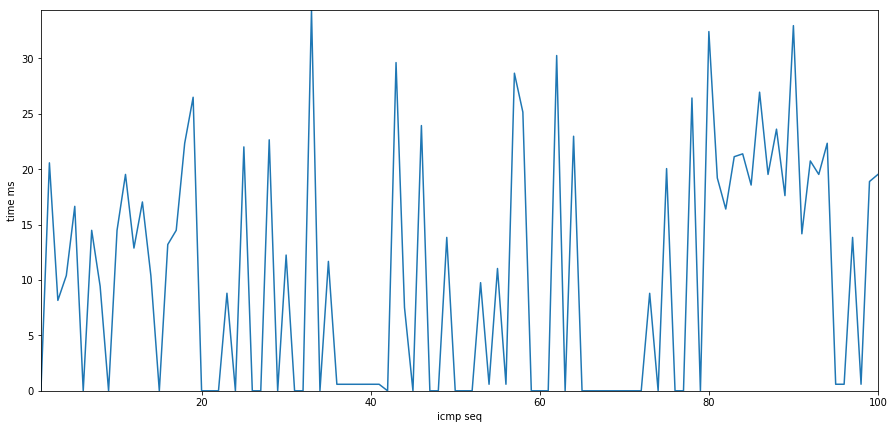

2001:db8::1711:6b10:65f6:8502


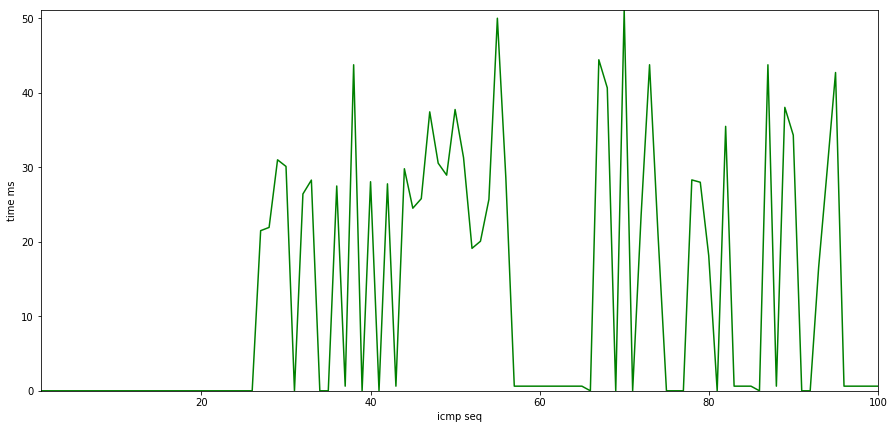

2001:db8::1711:6b10:65f1:5822


/Users/lucamaiano/miniconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3443: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


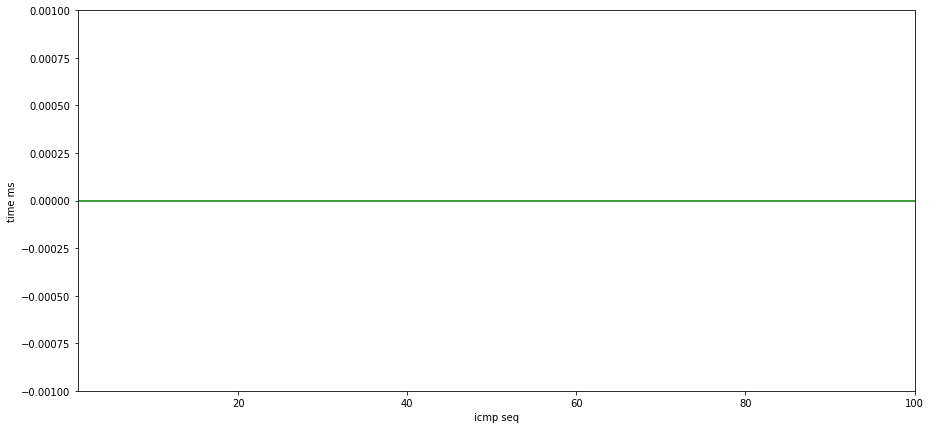

In [12]:
for ip in node:
    print(ip)
    tms = node[ip]
    
    plt.figure(figsize=(15,7))
    plt.ylabel('time ms')
    plt.xlabel('icmp seq')
    if ip in hops[1]:
        plt.plot(icmp_seq, tms, label=ip)
    elif ip in hops[2]:
        plt.plot(icmp_seq, tms, 'green', label=ip)
    else:
        plt.plot(icmp_seq, tms, 'red', label=ip)

    plt.axis([1,icmp_seq[-1], sorted(tms)[0], sorted(tms)[-1]])
    plt.show()

In [9]:
m_hop = {}
for h in hops:
    m_hop[h] = [0.0 for n in range(1, 101)]
    for ip in hops[h]:
        m_hop[h] = [(x + y)/len(hops[h]) for x, y in zip(m_hop[h], node[ip])]

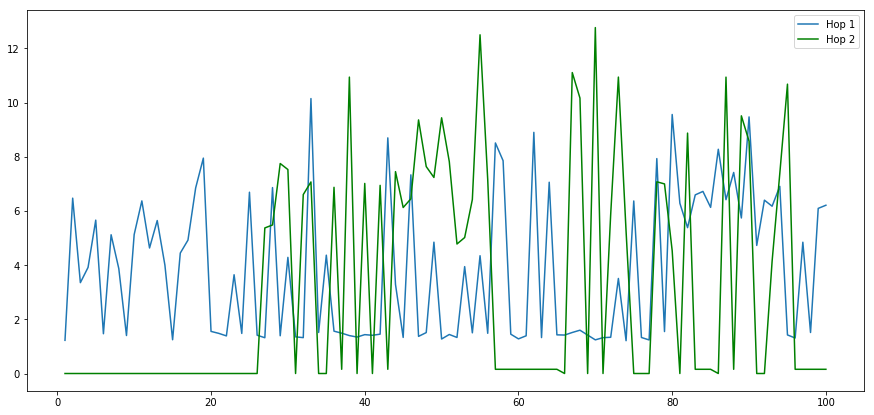

In [11]:
fig, ax = plt.subplots(figsize=(15,7))

# Using set_dashes() to modify dashing of an existing line
line1, = ax.plot(icmp_seq, m_hop[1], label='Hop 1')

# Using plot(..., dashes=...) to set the dashing when creating a line
line2, = ax.plot(icmp_seq, m_hop[2], 'green', label='Hop 2')

# Using plot(..., dashes=...) to set the dashing when creating a line
#line3, = ax.plot(icmp_seq, m_hop[3], 'red', label='Hop 3')


ax.legend()
plt.show()